In [1]:
cd /home/blansdel/projects/schwarz/decoder

/home/blansdel/projects/schwarz/decoder


In [2]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import pickle 

from collections import defaultdict
from scipy.stats import ranksums
from scipy.stats import chi2_contingency

In [3]:
TEST_IDX = 1
TRAIN_IDX = 2 
VAL_IDX = 3

In [4]:
with open('data/output/day6results.pkl', 'rb') as f:
    day6results = pickle.load(f)

with open('data/output/day7results.pkl', 'rb') as f:
    day7results = pickle.load(f)

with open('data/output/day9results.pkl', 'rb') as f:
    day9results = pickle.load(f)

In [5]:
certain_thresh = 0.999
certainnot_thresh = 0.001

In [7]:
def plot_decoder(res, suptitle, tmin = None, tmax = None):
    fig, axes = plt.subplots(3, 3, figsize = (16,16), sharex = True, sharey = True)
    certain_counts = {}

    for idx, k in enumerate(res[list(res.keys())[0]][1].keys()):
        y_test, y_preds_test, y_preds_test_proba = res[list(res.keys())[0]][1][k]
        y_test = y_test.reshape((12,-1))
        y_preds_test = y_preds_test.reshape((12,-1))
        y_preds_test_proba = y_preds_test_proba[:,0].reshape((12,-1))

        if tmin is not None and tmax is not None:
            y_preds_test_proba = y_preds_test_proba[:,tmin:tmax]

        i,j = divmod(idx, 3)

        axes[i,j].imshow(y_test, aspect = 'auto', interpolation = 'none', cmap = 'Greys', vmin = 0, vmax = 3)
        axes[i,j].axvline(x = 200, color = 'black')
        axes[i,j].axvline(x = 240, color = 'black')
        xx = range(len(y_preds_test_proba[0]))
        for t in range(12):
            axes[i,j].plot(xx, 0.8*y_preds_test_proba[t]+t-0.45, color = 'green')
        y_preds_test_proba_certain = (y_preds_test_proba > certain_thresh).astype(int)
        y_preds_test_proba_certainnot = (y_preds_test_proba < certainnot_thresh).astype(int)
        certain_counts[k] = np.sum(np.diff(y_preds_test_proba_certain, axis = 1) == 1, axis = 1) + \
                            np.sum(np.diff(y_preds_test_proba_certainnot, axis = 1) == 1, axis = 1)
        title = f"{k[0]} {k[1]}"
        axes[i,j].set_title(title)
    fig.suptitle(suptitle)
    return certain_counts

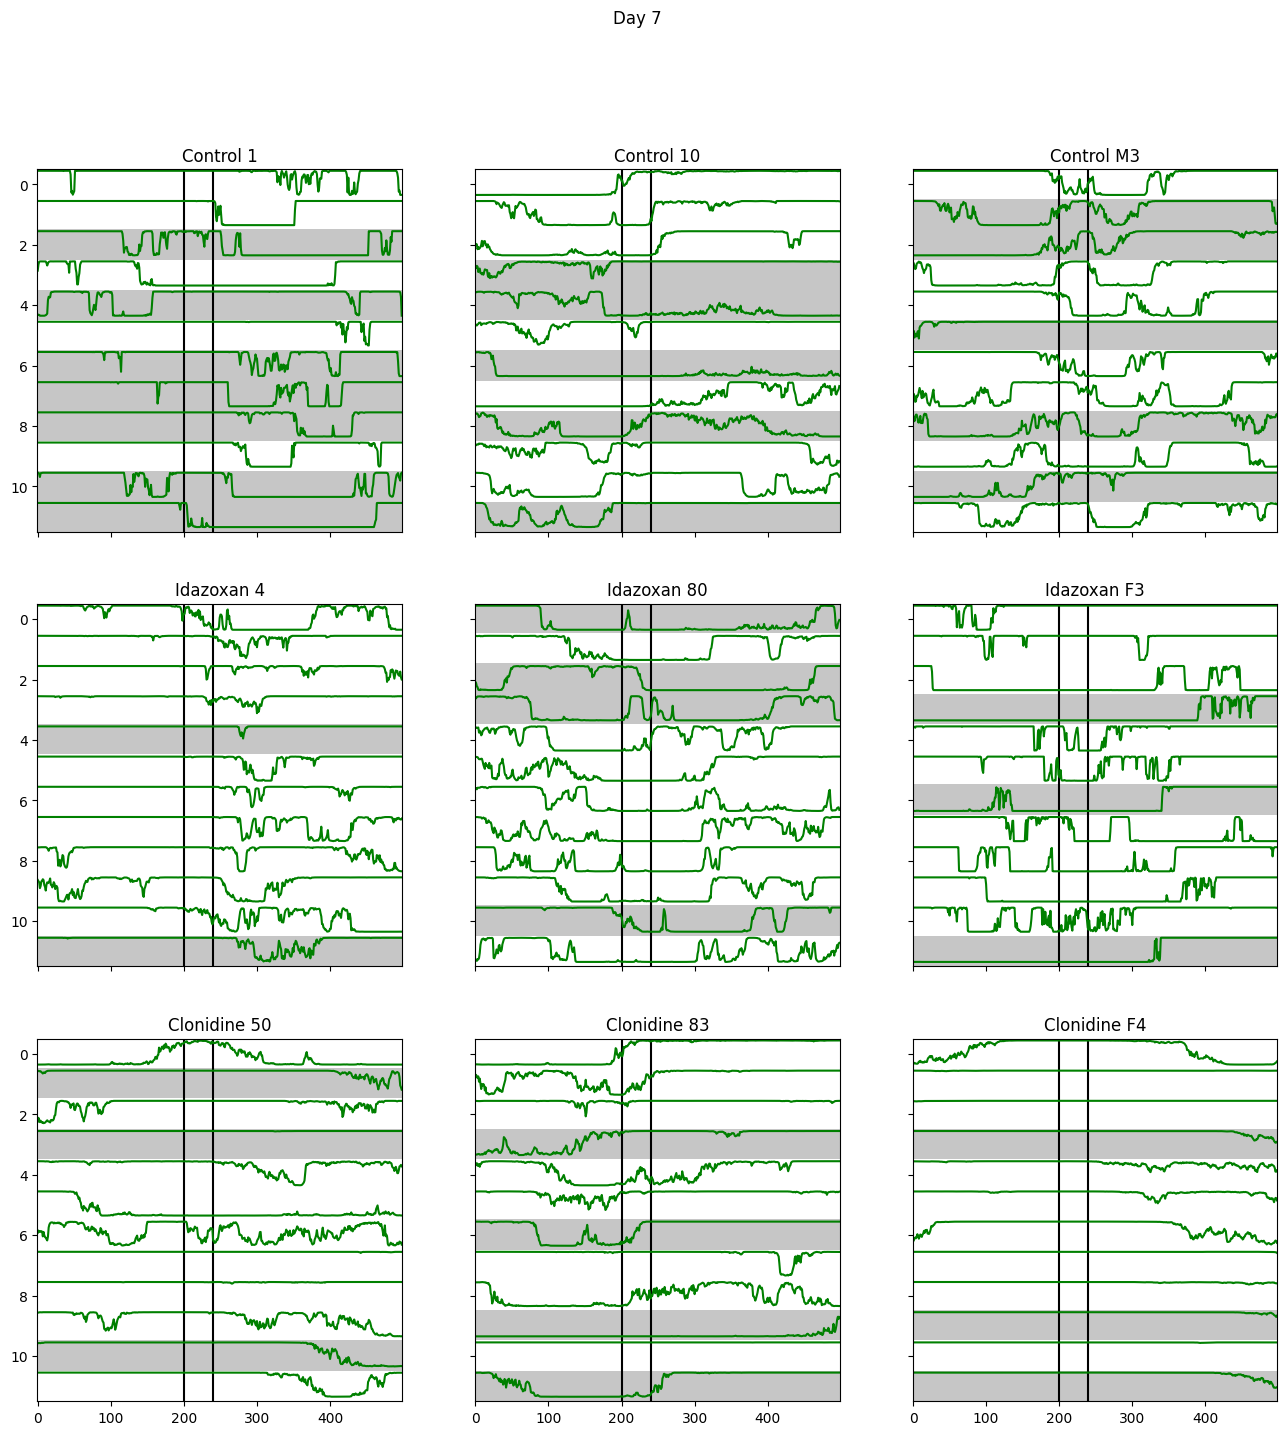

In [8]:
certain_counts_d7 = plot_decoder(day7results, 'Day 7', tmin = 0, tmax = 500)

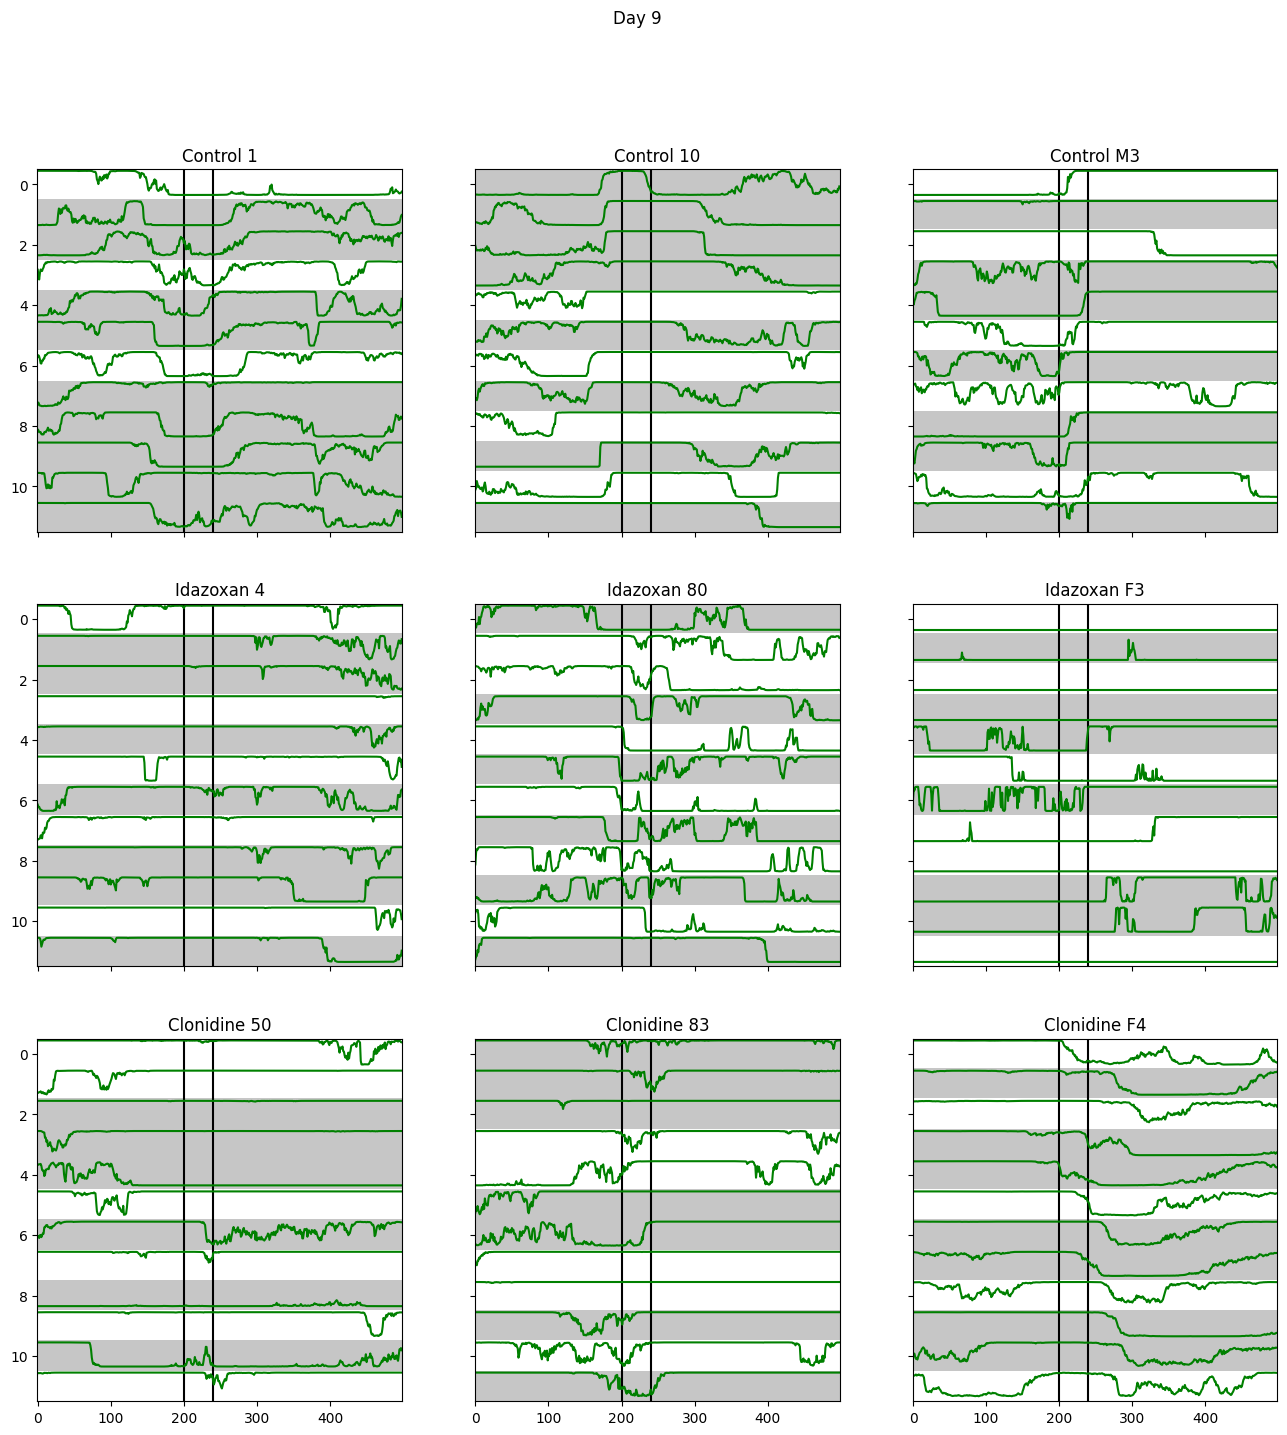

In [9]:
certain_counts_d9 = plot_decoder(day9results, 'Day 9', tmin = 0, tmax = 500)

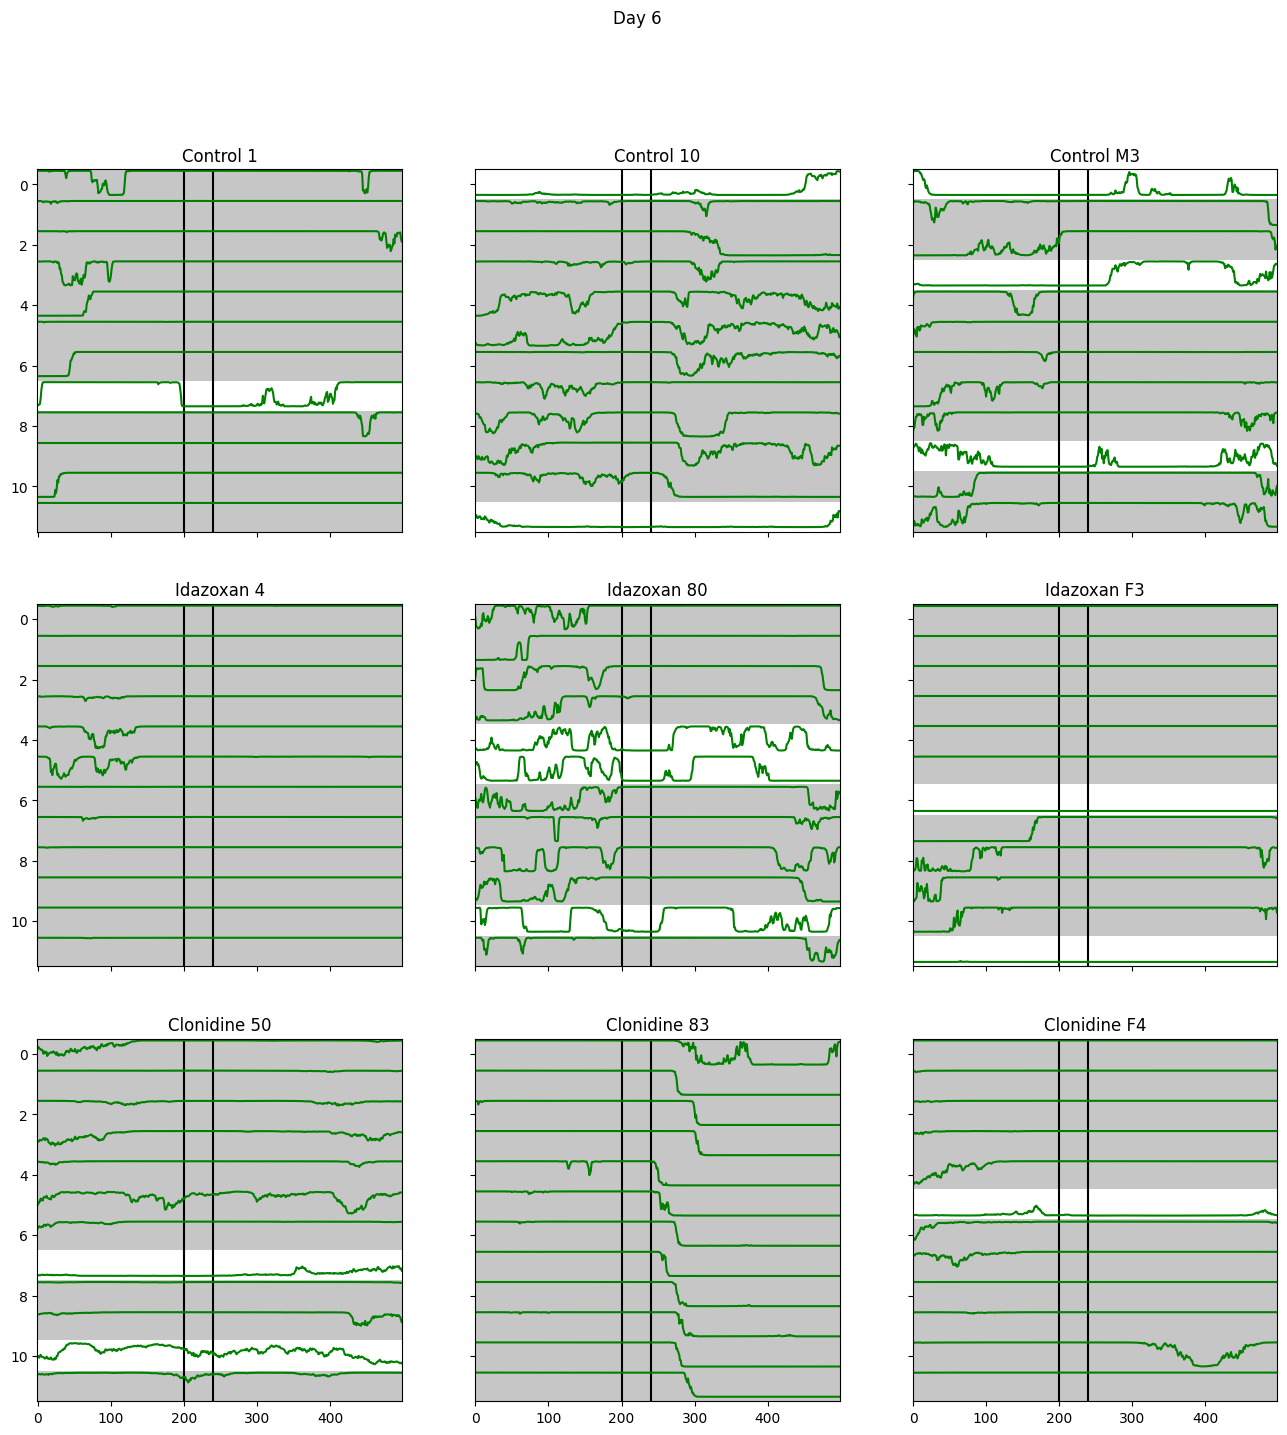

In [10]:
certain_counts_d6 = plot_decoder(day6results, 'Day 6', tmin = 0, tmax = 500)

## Count number of switches between certain predictions

Day 7

In [11]:
switches_by_groups = defaultdict(list)
for k in certain_counts_d7:
    switches_by_groups[k[0]] += list(certain_counts_d7[k])

print("Control v idazoxan", ranksums(switches_by_groups['Control'], switches_by_groups['Idazoxan']))
print("Control v clonidine", ranksums(switches_by_groups['Control'], switches_by_groups['Clonidine']))
print("Clonidine v idazoxan", ranksums(switches_by_groups['Clonidine'], switches_by_groups['Idazoxan']))

Control v idazoxan RanksumsResult(statistic=-1.9314826732585306, pvalue=0.05342339001325939)
Control v clonidine RanksumsResult(statistic=0.8840897367393274, pvalue=0.37664777306231634)
Clonidine v idazoxan RanksumsResult(statistic=-2.376343114038192, pvalue=0.017485195203169417)


In [12]:
for group in switches_by_groups:
    print(group, np.median(switches_by_groups[group]))

Control 9.5
Idazoxan 12.0
Clonidine 8.5


Day 9

In [13]:
switches_by_groups = defaultdict(list)
for k in certain_counts_d9:
    switches_by_groups[k[0]] += list(certain_counts_d9[k])

print("Control v idazoxan", ranksums(switches_by_groups['Control'], switches_by_groups['Idazoxan']))
print("Control v clonidine", ranksums(switches_by_groups['Control'], switches_by_groups['Clonidine']))
print("Clonidine v idazoxan", ranksums(switches_by_groups['Clonidine'], switches_by_groups['Idazoxan']))

Control v idazoxan RanksumsResult(statistic=-3.6377195537172327, pvalue=0.0002750626916646098)
Control v clonidine RanksumsResult(statistic=-0.06757373783994859, pvalue=0.9461249617684676)
Clonidine v idazoxan RanksumsResult(statistic=-3.192859112937571, pvalue=0.0014087165950319722)


In [14]:
for group in switches_by_groups:
    print(group, np.median(switches_by_groups[group]))

Control 6.0
Idazoxan 11.0
Clonidine 6.0


Day 6

In [15]:
switches_by_groups = defaultdict(list)
for k in certain_counts_d6:
    switches_by_groups[k[0]] += list(certain_counts_d6[k])
print("Control v idazoxan", ranksums(switches_by_groups['Control'], switches_by_groups['Idazoxan']))
print("Control v clonidine", ranksums(switches_by_groups['Control'], switches_by_groups['Clonidine']))
print("Clonidine v idazoxan", ranksums(switches_by_groups['Clonidine'], switches_by_groups['Idazoxan']))

Control v idazoxan RanksumsResult(statistic=0.05631144819995716, pvalue=0.9550936989624449)
Control v clonidine RanksumsResult(statistic=1.3176878878789977, pvalue=0.1876081508098646)
Clonidine v idazoxan RanksumsResult(statistic=-1.0980732398991646, pvalue=0.27217250939746407)


In [16]:
for group in switches_by_groups:
    print(group, np.median(switches_by_groups[group]))

Control 5.5
Idazoxan 6.0
Clonidine 3.0
